In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import torch 
import torch.nn as nn
import yfinance as yf
import keras 
import tensorflow
import datetime 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Activation
from keras import optimizers
from keras.models import Model
from keras.layers import Input


sp500list = pd.read_csv("SP500.csv")
ListOfTickers = []
for i in sp500list['Symbol']:
    ListOfTickers.append(i)


ListOfTickers.remove('BRK.B')
ListOfTickers.remove('BF.B')
ListOfTickers.remove('GEV')
ListOfTickers.remove('SOLV')
ListOfTickers.remove('HUBB')
#ListOfTickers.remove('AGN')
#ListOfTickers.remove('AGN')
ListOfTickers = ['aapl','goog','meta','msft','amzn','tsla','nvda']
print(ListOfTickers)

def TickerIntoTensor(ticker='aapl',daysago=100,split_percentage=0.9):
    df = yf.Ticker(ticker.upper())
    df = df.history(period='max')
    if df.shape[1] == 7:
        df = df.drop(columns=['Dividends','Stock Splits'])
    df = df.drop(columns=['Open','High','Low','Volume'])
    for i in range(daysago,-2,-1):
        df['{}daysago'.format(i)] = df['Close'].shift(i)
        df = df.copy()
    df = df.drop(columns=['Close'])
    df = df.drop(index=df.tail(1).index)
    df = df.drop(index=df.head(daysago).index)
    sc = MinMaxScaler(feature_range=(0,1))
    df_scaled = sc.fit_transform(df)
    X,Y = df_scaled[:,:daysago+1],df_scaled[:,-1]
    split = int(len(X)*split_percentage)
    X_train, X_test, Y_train, Y_test = X[:split], X[split:], Y[:split], Y[split:]
    X_train, X_test, Y_train, Y_test = X_train.reshape((-1,daysago+1,1)), X_test.reshape((-1,daysago+1,1)), Y_train.reshape((-1,1)), Y_test.reshape((-1,1))
    #X_train, X_test, Y_train, Y_test = torch.tensor(X_train).float(), torch.tensor(X_test).float(), torch.tensor(Y_train).float(), torch.tensor(Y_test).float()
    return X_train, X_test, Y_train, Y_test

sp500 = TickerIntoTensor('^gspc')
sp500_X_train = sp500[0]
sp500_X_test = sp500[1]
sp500_Y_train = sp500[2]
sp500_Y_test = sp500[3]


FileNotFoundError: [Errno 2] No such file or directory: 'SP500.csv'

In [ ]:
lstm_input = Input(shape=(101, 1), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')

for ticker in ListOfTickers:
    e= TickerIntoTensor(ticker)
    X_train= e[0]
    sp500_X_test = np.concatenate((sp500_X_test,e[1]))
    Y_train= e[2]
    sp500_Y_test = np.concatenate((sp500_Y_test,e[3]))
    
    print(ticker)
    model.fit(x=X_train, y=Y_train, batch_size=128, epochs=10, shuffle=True, validation_split = 0.1)

X_test = sp500_X_test
Y_test = sp500_Y_test

aapl
Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - loss: 2.7058e-04 - val_loss: 4.6226e-05
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - loss: 1.3751e-06 - val_loss: 4.2408e-05
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 118ms/step - loss: 1.3224e-06 - val_loss: 4.0897e-05
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - loss: 1.5020e-06 - val_loss: 4.8324e-05
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - loss: 1.2348e-06 - val_loss: 4.8456e-05
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - loss: 1.2993e-06 - val_loss: 5.0463e-05
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - loss: 1.5438e-06 - val_loss: 3.8582e-05
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 114ms/step - loss: 1.4562e-06 - val_loss: 3.6855e-05
Epoch 9/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - loss: 1.2426e-06 - val_loss: 3.6342e-05
Epoch 10/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 110ms/step - loss: 1.4000e-06 - val_loss: 3.4924e-05
goog
Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/s

Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 162ms/step - loss: 1.6465e-07 - val_loss: 1.2841e-05
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 157ms/step - loss: 1.6646e-07 - val_loss: 1.2799e-05
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 156ms/step - loss: 1.5383e-07 - val_loss: 1.2736e-05
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - loss: 1.5581e-07 - val_loss: 1.2685e-05
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - loss: 1.3499e-07 - val_loss: 1.2577e-05
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - loss: 1.4709e-07 - val_loss: 1.2740e-05


In [ ]:
y_pred = model.predict(X_test)
avg_error = (np.sum(np.sqrt((Y_test - y_pred)**2)))/len(Y_test)*100
print(avg_error)
avg_error = (np.sum(y_pred - Y_test))/len(Y_test)*100
print(avg_error)

915/915 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step
1.031674037552861
-0.11602135339395557


<Axes: >

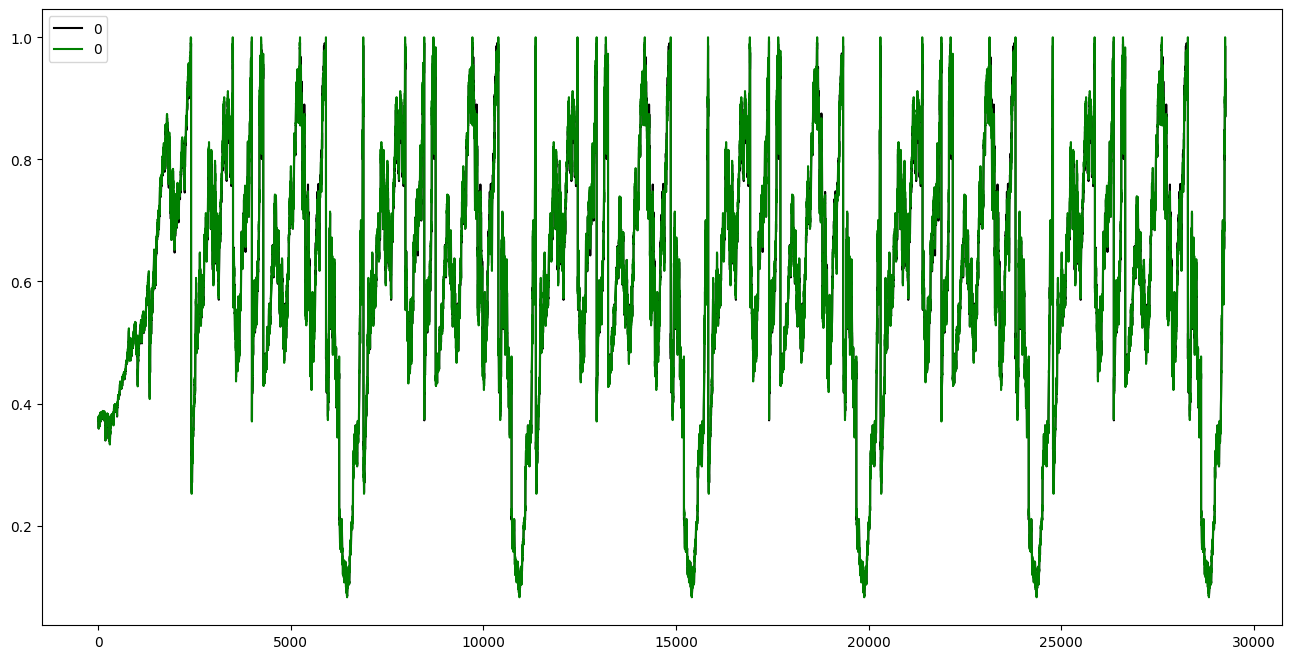

In [ ]:
q,w = pd.DataFrame(y_pred),pd.DataFrame(Y_test)
e = pd.concat([q,w],axis=1)
e.plot(figsize=(16,8),color = ('black','green'))

In [ ]:
def UserInput_Shit(ticker='aapl',daysago=100):
    df = yf.Ticker(ticker.upper())
    df = df.history(period='max',end='2023-01-01')
    if df.shape[1] == 7:
        df = df.drop(columns=['Dividends','Stock Splits'])
    df = df.drop(columns=['Open','High','Low','Volume'])
    for i in range(daysago,-2,-1):
        df['{}daysago'.format(i)] = df['Close'].shift(i)
        df = df.copy()
    df = df.drop(columns=['Close'])
    df = df.drop(index=df.tail(1).index)
    df = df.drop(index=df.head(daysago).index)
    sc = MinMaxScaler(feature_range=(0,1))
    df_scaled = sc.fit_transform(df)
    X,Y = df_scaled[:,:daysago+1],df_scaled[:,-1]
    X_train, X_test, Y_train, Y_test = X[:-1], X[-1:], Y[:-1], Y[-1:]
    X_train, X_test, Y_train, Y_test = X_train.reshape((-1,daysago+1,1)), X_test.reshape((-1,daysago+1,1)), Y_train.reshape((-1,1)), Y_test.reshape((-1,1))
    #X_train, X_test, Y_train, Y_test = torch.tensor(X_train).float(), torch.tensor(X_test).float(), torch.tensor(Y_train).float(), torch.tensor(Y_test).float()
    return X_train, X_test, Y_train, Y_test

X_test = UserInput_Shit()[1]

In [ ]:

def UserInput_Two(ticker='aapl',daysago=100,futureproj=20):
    X_test = UserInput_Shit(ticker,daysago)[1]
    y_pred_proj = []
    for i in range(1,futureproj+1):
        y_pred = model.predict(X_test)
        y_pred_proj = np.append(y_pred_proj,y_pred)
        X_test = X_test.reshape((-1))
        X_test = np.append(X_test, y_pred)
        #X_test = X_test[1:]
        X_test = X_test.reshape((-1,daysago+1+i,1))
    return y_pred_proj 

UserInput_Two()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([0.70369679, 0.70221651, 0.70010179, 0.69718748, 0.69381535,
       0.69025946, 0.68668622, 0.68317771, 0.6797629 , 0.67644334,
       0.67320752, 0.67004275, 0.66693753, 0.66388363, 0.66087461,
       0.65790755, 0.65497917, 0.65208799, 0.64923215, 0.64641106])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


<Axes: >

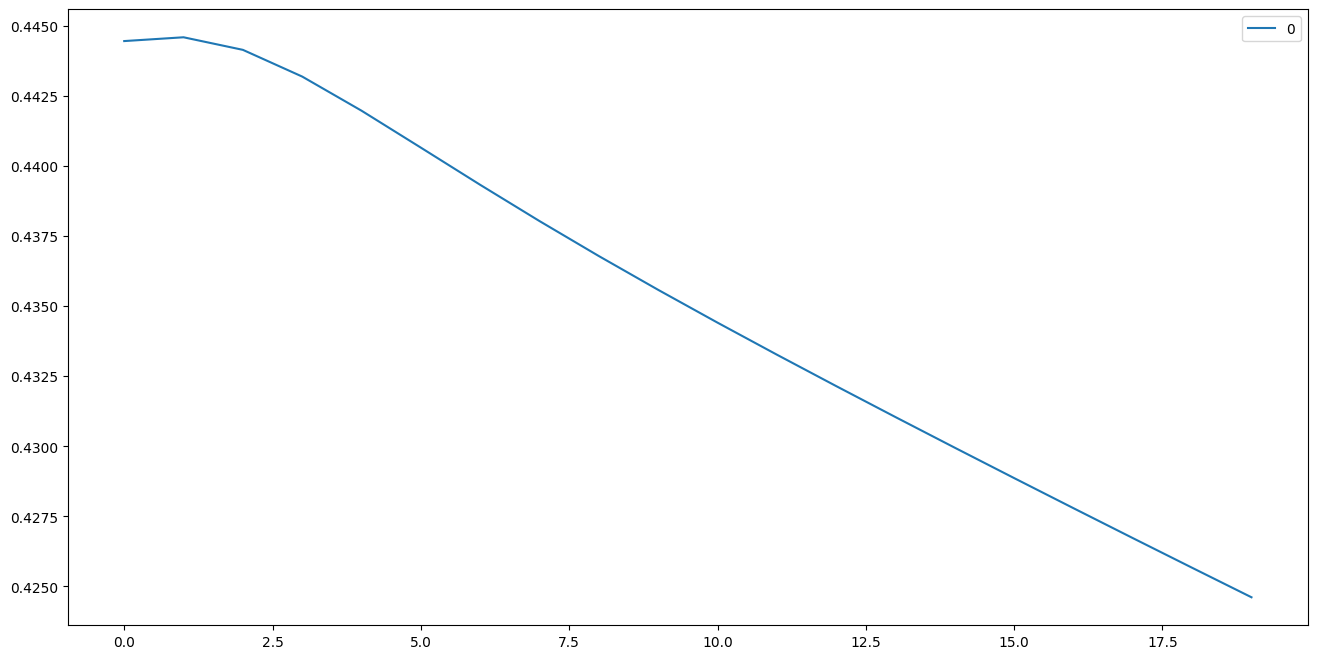

In [ ]:
e = pd.DataFrame(UserInput_Two('amzn',50,20))
e.plot(figsize=(16,8))